In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

warnings.simplefilter("ignore")

In [2]:
train = pd.read_csv('assignment_2_train.csv')
test = pd.read_csv('assignment_2_test.csv')

print("gf_train.shape = {} rows, {} cols".format(*train.shape))
print("df_test.shape = {} rows, {} cols".format(*test.shape))
train.head(n=2)

gf_train.shape = 180000 rows, 394 cols
df_test.shape = 100001 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

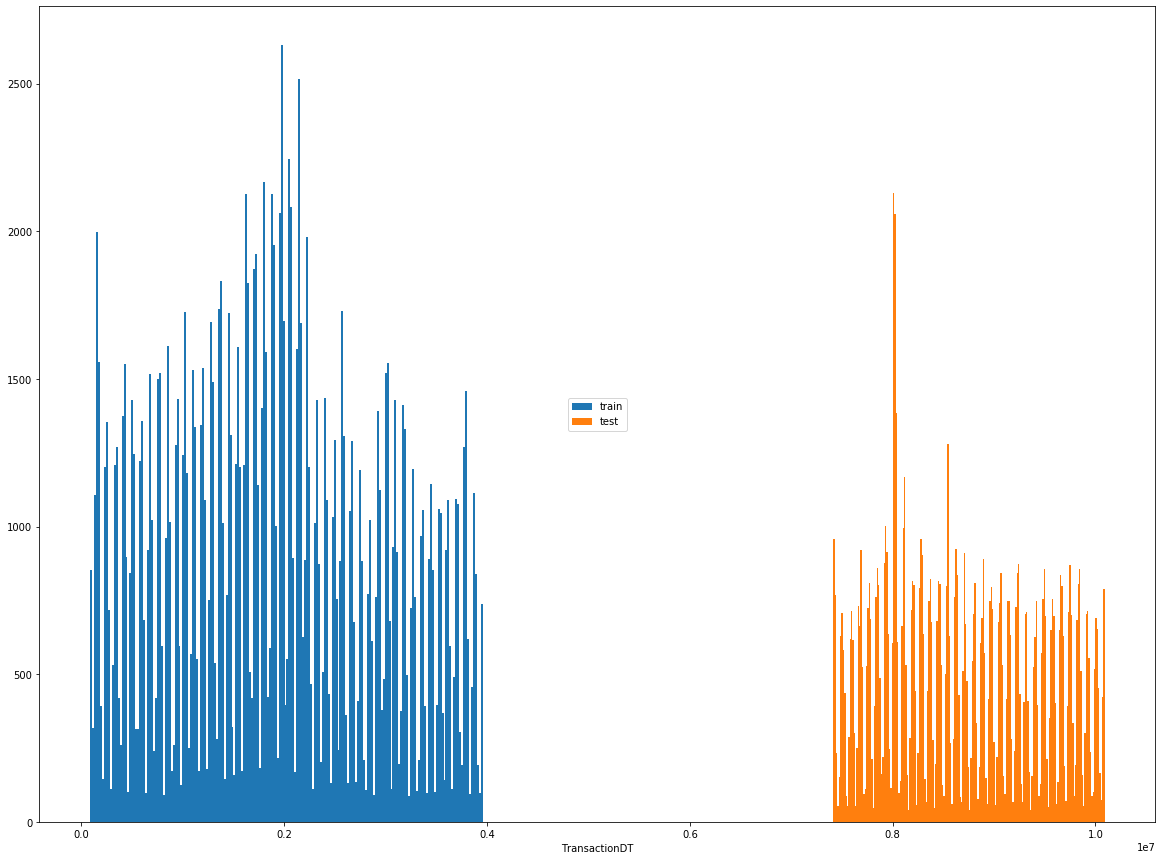

In [3]:
fig = plt.figure(figsize=(20, 15))

plt.hist(train['TransactionDT'], bins=200, label='train')
plt.hist(test['TransactionDT'], bins=200, label='test')
plt.xlabel('TransactionDT')

plt.legend(loc="center")
plt.show()

Распределение для трейна и теста вообще не совпадает, поэтому, возможно, тут нужна валидация со стратифицированной выборкой (которая мало что даст на самом деле, потому что вообще нет пересечений трейна и теста).
Или проверить, насколько коррелирован этот признак с целевой переменной и принять решение об удалении его из данных

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

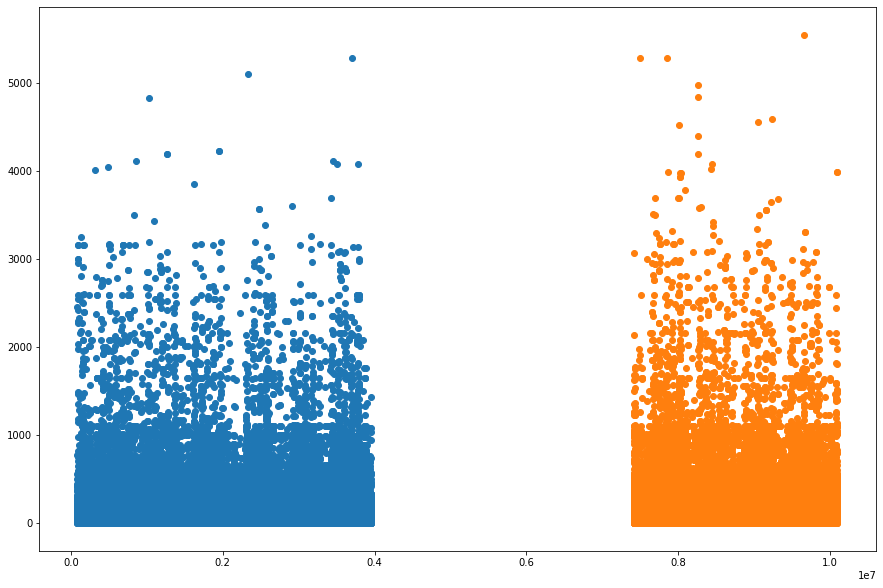

In [4]:
fig = plt.figure(figsize = (15, 10))

plt.scatter(train['TransactionDT'], train['TransactionAmt'], label='train')
plt.scatter(test['TransactionDT'], test['TransactionAmt'], label='test')

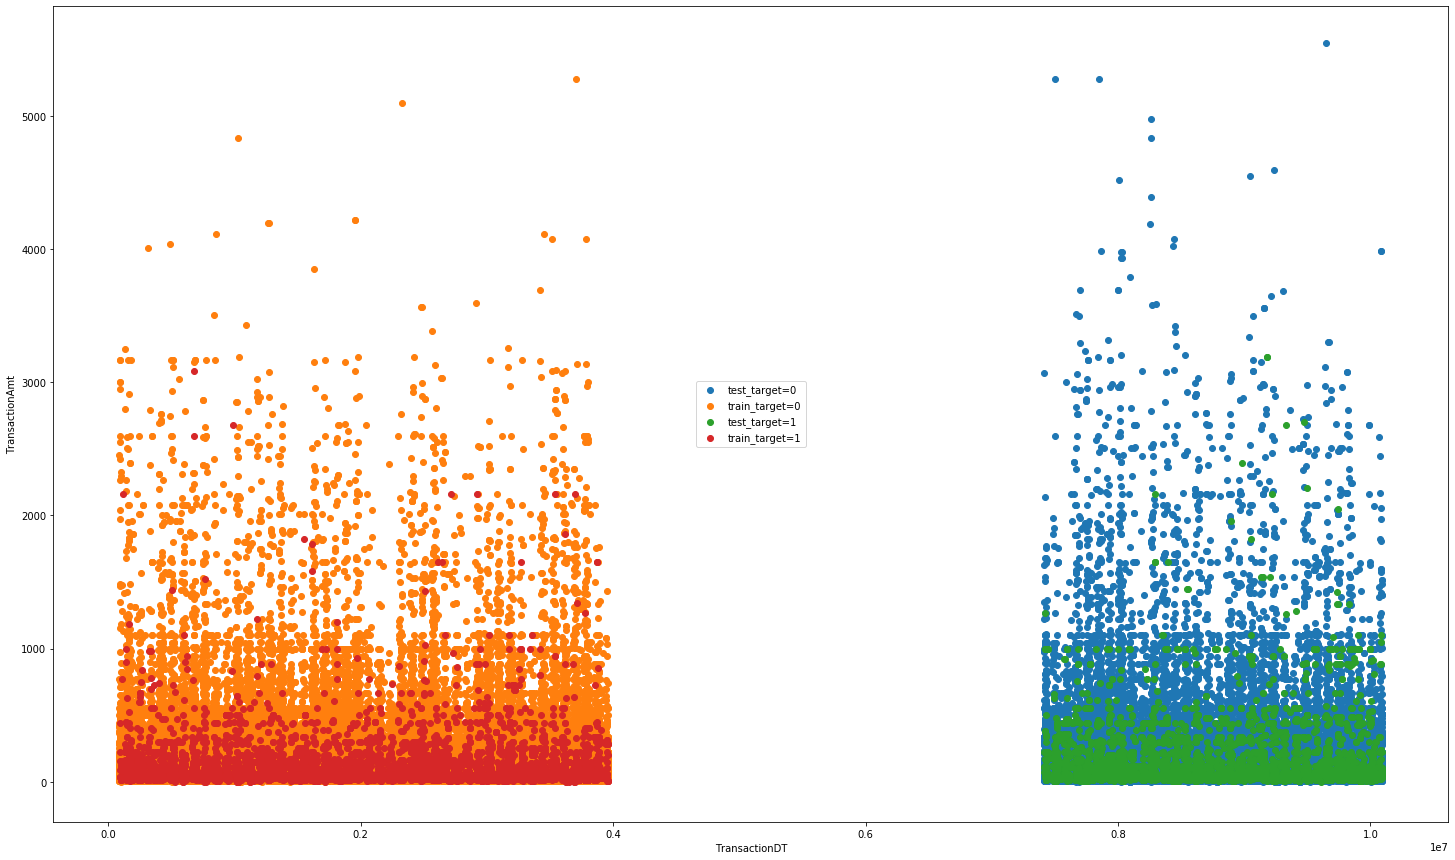

In [5]:
fig = plt.figure(figsize=(25, 15))

plt.scatter(test.loc[test['isFraud']==0]['TransactionDT'], test.loc[test['isFraud']==0]['TransactionAmt'], 
            label='test_target=0')

plt.scatter(train.loc[train['isFraud']==0]['TransactionDT'], train.loc[train['isFraud']==0]['TransactionAmt'], 
            label='train_target=0')

plt.scatter(test.loc[test['isFraud']==1]['TransactionDT'], test.loc[test['isFraud']==1]['TransactionAmt'], 
            label='test_target=1')

plt.scatter(train.loc[train['isFraud']==1]['TransactionDT'], train.loc[train['isFraud']==1]['TransactionAmt'], 
            label='train_target=1')

plt.xlabel('TransactionDT')
plt.ylabel('TransactionAmt')
plt.legend(loc="center")
plt.show()

Распределение для трейна и теста похоже, но различается в разрезе целевой переменной. Плюс есть выбросы, которые надо посмотреть.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

(array([1.74359e+05, 4.16700e+03, 7.14000e+02, 4.14000e+02, 2.18000e+02,
        1.02000e+02, 1.20000e+01, 1.10000e+01, 0.00000e+00, 3.00000e+00]),
 array([2.9200000e-01, 5.2815780e+02, 1.0560236e+03, 1.5838894e+03,
        2.1117552e+03, 2.6396210e+03, 3.1674868e+03, 3.6953526e+03,
        4.2232184e+03, 4.7510842e+03, 5.2789500e+03]),
 <a list of 10 Patch objects>)

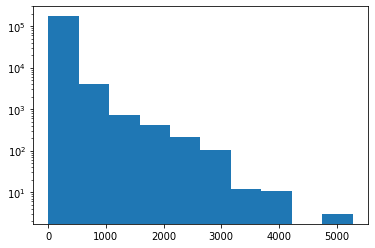

In [6]:
plt.hist(train['TransactionAmt'], log=True)

(array([9.6878e+04, 2.1100e+03, 4.9800e+02, 2.6600e+02, 1.3300e+02,
        8.0000e+01, 1.7000e+01, 1.1000e+01, 5.0000e+00, 3.0000e+00]),
 array([2.5100000e-01, 5.5454890e+02, 1.1088468e+03, 1.6631447e+03,
        2.2174426e+03, 2.7717405e+03, 3.3260384e+03, 3.8803363e+03,
        4.4346342e+03, 4.9889321e+03, 5.5432300e+03]),
 <a list of 10 Patch objects>)

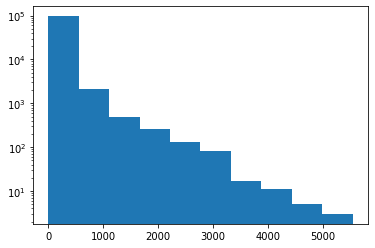

In [7]:
plt.hist(test['TransactionAmt'], log=True)

Распределение похоже на экспоненциальное, от нормального далеко. 

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

In [8]:
for c in ['ProductCD', 'card4', 'card6']:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

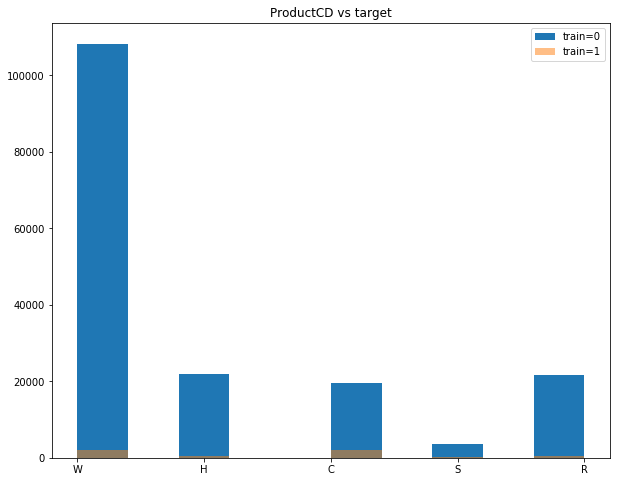

In [9]:
fig = plt.figure(figsize=(10, 8))

plt.hist(train.loc[train['isFraud']==0]['ProductCD'], 
            label='train=0')
plt.hist(train.loc[train['isFraud']==1]['ProductCD'],  
            label='train=1', alpha=0.5)

plt.title('ProductCD vs target')
plt.legend(loc="upper right")
plt.show()

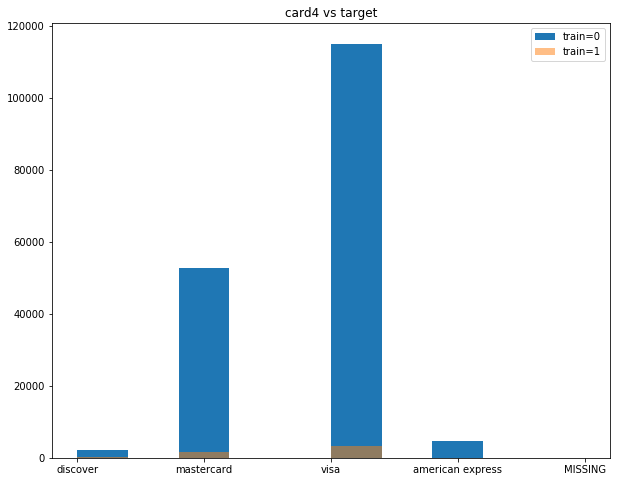

In [10]:
fig = plt.figure(figsize=(10, 8))

plt.hist(train.loc[train['isFraud']==0]['card4'], 
            label='train=0')
plt.hist(train.loc[train['isFraud']==1]['card4'],  
            label='train=1', alpha=0.5)

plt.title('card4 vs target')
plt.legend(loc="upper right")
plt.show()

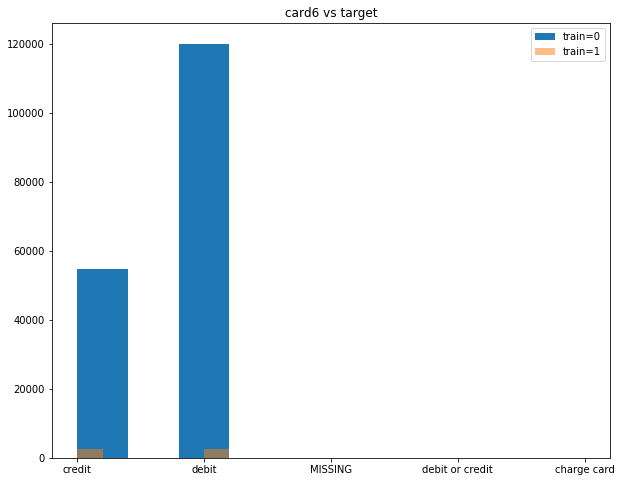

In [11]:
fig = plt.figure(figsize=(10, 8))

plt.hist(train.loc[train['isFraud']==0]['card6'], 
            label='train=0')
plt.hist(train.loc[train['isFraud']==1]['card6'],  
            label='train=1', alpha=0.5)

plt.title('card6 vs target')
plt.legend(loc="upper right")
plt.show()